## Molecular Hamiltonians  - Parity Transformations

The transformation of molecular Hamiltonians into qubit operators plays a pivotal role in simulating quantum systems. Among the various methods used for this mapping, the **Parity Transformation** stands out for its unique approach to simplifying the simulation of fermionic systems. 

Fermions, as particles that obey the Pauli exclusion principle, are governed by anti-commutation relations, making their quantum simulation complex. The challenge lies in representing fermionic creation and annihilation operators on qubits in a way that preserves these fundamental commutation properties. The Parity Transformation addresses this by encoding the number of fermions in a particular subset of orbitals through qubit parity. 

In this transformation, the number of qubits needed is the same as the number of spin orbitals, similar to the Jordan-Wigner transformation. However, unlike Jordan-Wigner, which directly maps fermionic operators to qubit operators with increasing non-locality, the Parity Transformation reduces the locality of operators by encoding fermionic parity. This often leads to a more efficient qubit operator representation for certain molecular systems.

The mathematical representation of fermionic operators under the Parity Transformation involves the use of Pauli matrices. The creation and annihilation operators for fermions are mapped onto combinations of Pauli X, Y, and Z matrices, but with the advantage of fewer long-range interactions between qubits compared to Jordan-Wigner. This reduction in non-local terms can make the Parity Transformation more favorable for certain quantum algorithms, such as those used in quantum chemistry simulations.

From a computational perspective, the Parity Transformation strikes a balance between the simplicity of Jordan-Wigner and the reduced locality offered by Bravyi-Kitaev, making it a versatile tool for mapping molecular Hamiltonians. It has been leveraged in quantum algorithms like the Variational Quantum Eigensolver (VQE) to solve problems in molecular electronic structure, providing researchers with an additional method to optimize quantum simulations.

As we continue to develop quantum algorithms that push the boundaries of classical computation, the Parity Transformation offers a promising avenue for optimizing molecular simulations. Its efficiency in reducing qubit interactions can significantly improve the performance of quantum algorithms, particularly as we move towards scaling up quantum systems. With ongoing advancements in quantum hardware and error mitigation techniques, the Parity Transformation could become a central tool in the toolbox of quantum chemists and engineers alike, enabling more accurate and efficient simulations of complex molecular systems. 

The evolution of hybrid quantum-classical algorithms will likely integrate the strengths of the Parity Transformation more deeply, unlocking new possibilities for practical quantum simulations in chemistry, materials science, and beyond. This transformation method, coupled with the rising power of quantum processors, positions us closer to realizing the full potential of quantum simulations in solving real-world scientific problems.

The molecular Hamiltonian in the Parity Transformation maps fermionic operators to qubit operators. A general form of the Hamiltonian for a two-qubit system can be written as:

$$
\hat{H} = \sum_{i,j} h_{ij} a_i^\dagger a_j
$$

Where:

- $h_{ij}$ are the matrix elements of the one- and two-electron integrals.
- $a_i^\dagger$ and $a_j$ are the fermionic creation and annihilation operators.

In the Parity Transformation, these operators are mapped to qubit Pauli operators using the following transformation:

$$
a_i^\dagger \rightarrow \frac{1}{2}(X_i - iY_i) Z_{i+1} Z_{i+2} \dots Z_{n-1}
$$

$$
a_i \rightarrow \frac{1}{2}(X_i + iY_i) Z_{i+1} Z_{i+2} \dots Z_{n-1}
$$

Thus, the molecular Hamiltonian is transformed into a qubit Hamiltonian of the form:

$$
\hat{H}_{qubit} = \sum_{k} c_k P_k
$$

Where $P_k$ are the Pauli terms (e.g., $I$, $X$, $Y$, $Z$), and $c_k$ are the corresponding coefficients for each Pauli string.


In [1]:
# Importing necessary modules
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import SparsePauliOp
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_city, plot_state_qsphere, plot_state_paulivec
from qiskit.quantum_info import partial_trace, Statevector
from qiskit_aer import AerSimulator, StatevectorSimulator  # Use StatevectorSimulator for statevector retrieval
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Define the Hamiltonian for H₂ molecule (simplified example)
# H2 molecular Hamiltonian represented as qubit operators using Parity Transformation
# Hamiltonian terms (coefficients and Pauli operators)
coeffs = [-0.8105479805373267, 0.17218393261915543, -0.22575349222402502, 0.12091263261776641, 0.16892753870087907]
pauli_strings = ['II', 'ZI', 'IZ', 'ZZ', 'XX']

In [3]:
# Create a sparse Pauli operator for the Hamiltonian
H2_hamiltonian = SparsePauliOp.from_list([(pauli_strings[i], coeffs[i]) for i in range(len(coeffs))])

In [4]:
# Create a quantum circuit for simulating this Hamiltonian using Parity Transformation
num_qubits = 2
qc = QuantumCircuit(num_qubits)

In [5]:
# Apply an initial state (e.g., Hartree-Fock state)
qc.x(0)
qc.x(1)

In [6]:
# Applying operations to evolve under the molecular Hamiltonian
qc.h(0)  # Hadamard gate to create superposition
qc.cx(0, 1)  # CNOT gate for interaction terms
qc.rx(np.pi/4, 0)  # Rotation to simulate part of the Hamiltonian evolution
qc.rx(np.pi/4, 1)  # Rotation on qubit 1

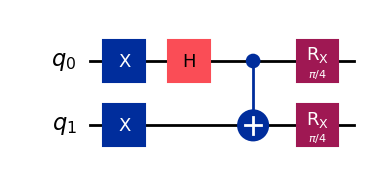

In [7]:
# Draw the circuit using MPL
qc.draw(output='mpl')
plt.show()

In [8]:
# Simulate the circuit using StatevectorSimulator
simulator = StatevectorSimulator()  # Use StatevectorSimulator for statevector retrieval

In [9]:
# Transpile the circuit for the simulator
tqc = transpile(qc, simulator)

In [10]:
# Run the simulation
result = simulator.run(tqc).result()

In [11]:
# Get the final statevector
state = result.get_statevector(tqc)

<Figure size 640x480 with 0 Axes>

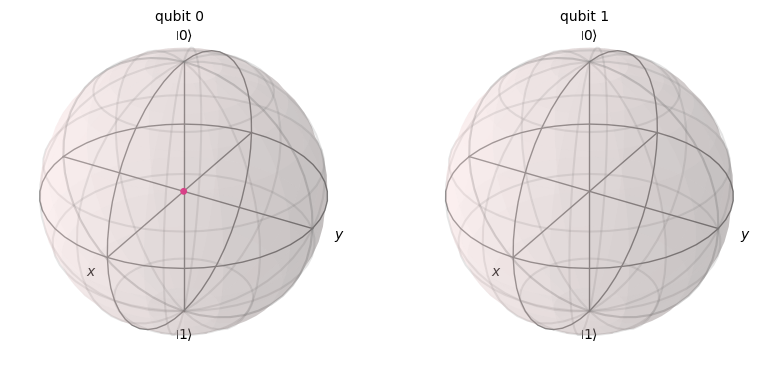

In [12]:
# Visualize the state using a Bloch multivector
fig = plt.figure()
plot_bloch_multivector(state)
plt.show()

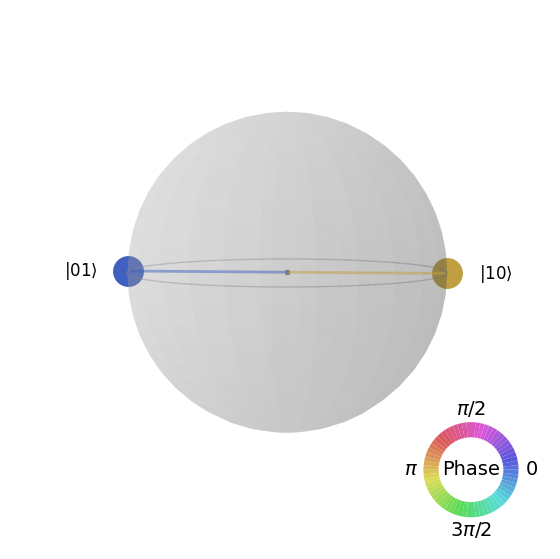

In [13]:
# Visualizing the state using the QSphere
plot_state_qsphere(state)
plt.show()

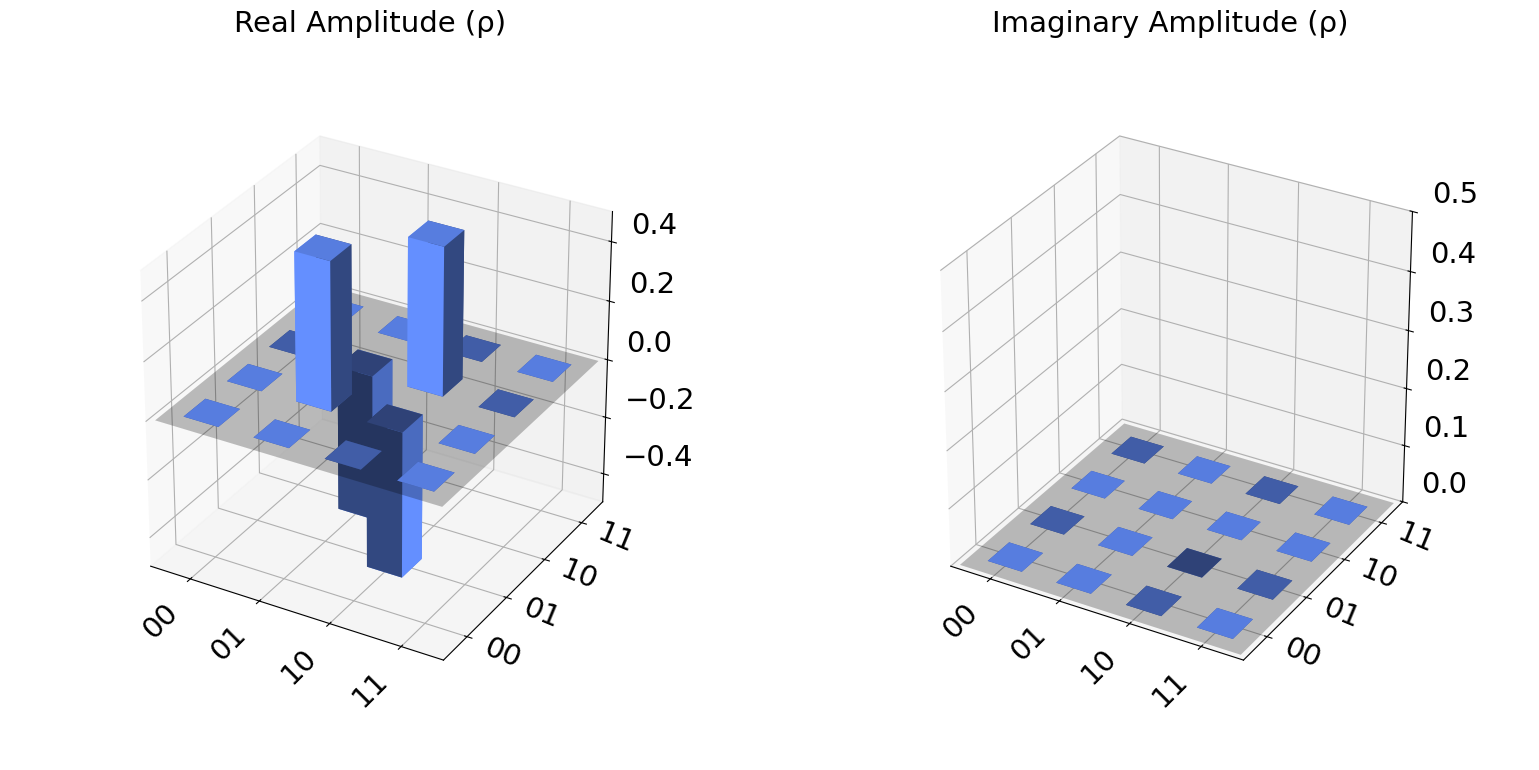

In [14]:
# Visualizing the state using a state city plot
plot_state_city(state)
plt.show()

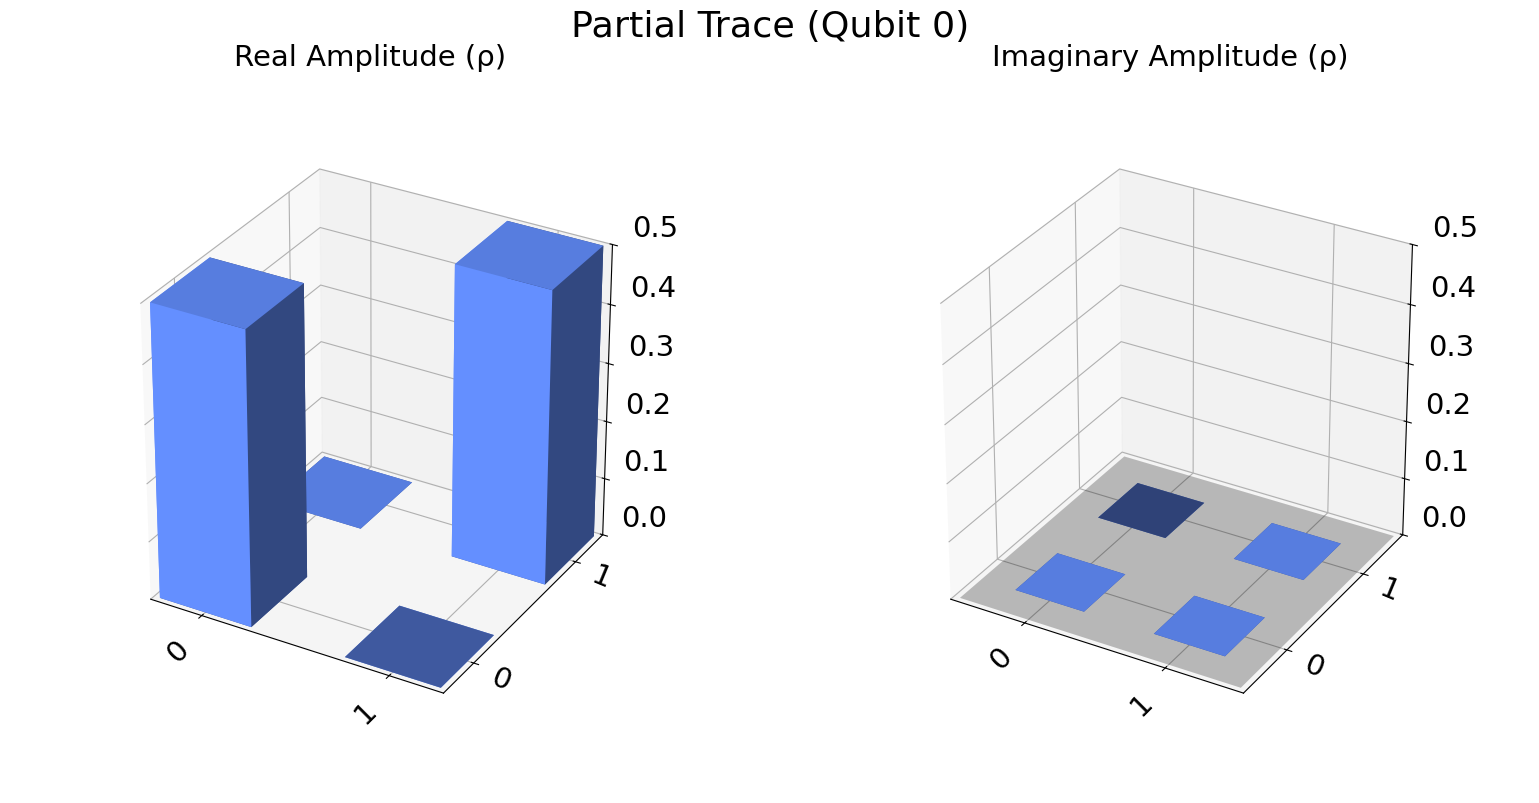

In [15]:
# Partial Trace Visualization (Tracing out one qubit)
rho = partial_trace(state, [1])  # Trace out the second qubit 
plot_state_city(rho, title="Partial Trace (Qubit 0)")
plt.show()

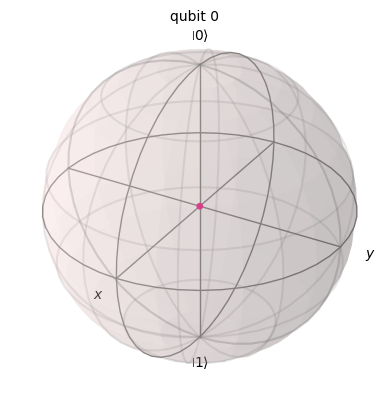

In [16]:
# Partial trace to reduce the number of qubits (e.g., trace out qubit 1)
reduced_density_matrix = partial_trace(state, [1])

# Visualizing the reduced state with a Bloch multivector
plot_bloch_multivector(reduced_density_matrix)
plt.show()

In [ ]:
# Pauli Vector Visualization 
plot_state_paulivec(state)
plt.title("Pauli Vector Representation")
plt.show()

In [17]:
# Measurement (add measurements to all qubits)
qc.measure_all()

In [18]:
# Transpile and run the circuit with measurement
tqc_measure = transpile(qc, simulator)
result_measure = simulator.run(tqc_measure).result()
counts = result_measure.get_counts(tqc_measure)

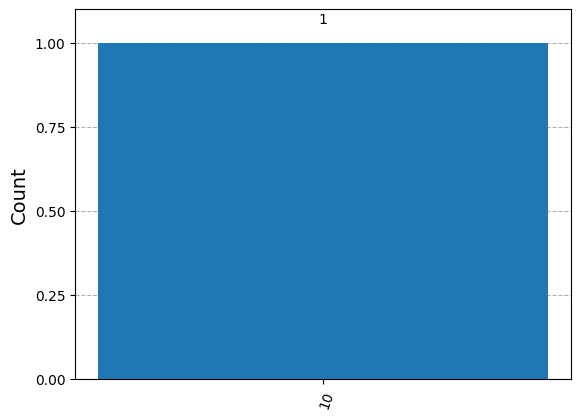

In [19]:
# Visualizing the measurement results using a histogram
plot_histogram(counts)
plt.show()